In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from sklearn.cluster import DBSCAN
import math
import seaborn as sns

In [2]:
filename = '0f20c52c24764413a7072e1fd034b2b4.xls'
df = pd.read_excel(filename)
df.shape

(1288, 22)

In [3]:
df = df[df['weekday'].isin([i for i in range(1,6)])]

In [4]:
len(set(df['datetime']))

213

In [5]:
df.shape

(911, 22)

In [6]:
df = df[df['weekday'].isin([i for i in range(1,6)])]
df['weekday'].value_counts()

2    204
5    185
1    180
3    176
4    166
Name: weekday, dtype: int64

In [33]:
#df['start_address_name'].value_counts()

In [34]:
address_gps = []
address_gps.append(df.iloc[0]['start_gps_poi'])
for i in range(1,df.shape[0]):
    if df.iloc[i]['datetime'] != df.iloc[i-1]['datetime']:
        address_gps.append(df.iloc[i]['start_gps_poi'])
        address_gps.append(df.iloc[i-1]['end_gps_poi'])
address_gps.append(df.iloc[df.shape[0]-1]['end_gps_poi'])

In [35]:
len(address_gps)

426

In [36]:
pointsList = []
for item in address_gps:
    point = []
    point.append(float(item.split(',')[0]))
    point.append(float(item.split(',')[1]))
    pointsList.append(point)  
with open('a.txt','w') as f:
    f.write(str(pointsList))

In [11]:
xy = np.array(pointsList)
#xy[:,0]
xy

array([[107.5326666,  26.6363333],
       [107.415    ,  26.5681666],
       [107.4151666,  26.5683333],
       [107.1833333,  26.3833333],
       [107.4148333,  26.5681666],
       [107.4148333,  26.568    ],
       [107.4148333,  26.5681666],
       [107.4148333,  26.568    ],
       [107.4148333,  26.5681666],
       [107.5233333,  26.6346666],
       [107.5223333,  26.6341666],
       [107.415    ,  26.5681666],
       [107.4151666,  26.5683333],
       [107.4151666,  26.5685   ],
       [107.4148333,  26.568    ],
       [107.4718333,  26.6873333],
       [107.4716666,  26.6875   ],
       [107.4151666,  26.5683333],
       [107.4148333,  26.568    ],
       [107.415    ,  26.5681666],
       [107.4144999,  26.5668333],
       [107.415    ,  26.5681666],
       [107.4148333,  26.568    ],
       [107.4156666,  26.5696666],
       [107.4156666,  26.5711666],
       [107.4148333,  26.5681666],
       [107.4148333,  26.5681666],
       [107.415    ,  26.5681666],
       [107.4148333,

In [12]:
pointsList


[[107.53266660000003, 26.636333300000004],
 [107.41500000000002, 26.568166599999998],
 [107.41516660000002, 26.568333300000006],
 [107.18333330000002, 26.383333300000004],
 [107.4148333, 26.568166599999998],
 [107.4148333, 26.567999999999998],
 [107.4148333, 26.568166599999998],
 [107.4148333, 26.567999999999998],
 [107.4148333, 26.568166599999998],
 [107.52333329999999, 26.634666600000003],
 [107.52233330000001, 26.6341666],
 [107.41500000000002, 26.568166599999998],
 [107.41516660000002, 26.568333300000006],
 [107.41516660000002, 26.5685],
 [107.4148333, 26.567999999999998],
 [107.47183330000001, 26.687333300000006],
 [107.47166659999999, 26.6875],
 [107.41516660000002, 26.568333300000006],
 [107.4148333, 26.567999999999998],
 [107.41500000000002, 26.568166599999998],
 [107.41449990000001, 26.5668333],
 [107.41500000000002, 26.568166599999998],
 [107.4148333, 26.567999999999998],
 [107.41566660000001, 26.569666600000005],
 [107.41566660000001, 26.571166599999998],
 [107.4148333, 26.5

In [13]:
X = pd.DataFrame(
        {
         "lng": xy[:,0],
         "lat": xy[:,1]
        })
#X
# X.describe()

In [14]:
# kmeans = KMeans(n_clusters = 3)
# re = kmeans.fit(xy)

In [15]:
#re.labels_

In [16]:
#dir(re)

In [17]:
fig =plt.figure(figsize=(50,50))

<Figure size 3600x3600 with 0 Axes>

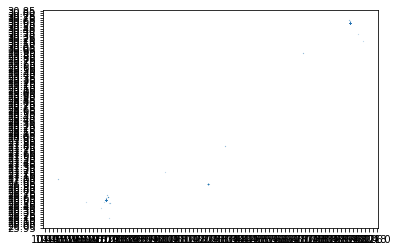

In [18]:
plt.scatter(xy[:,0],xy[:,1],s=0.01)
plt.locator_params(nbins = 100)

In [19]:
def haversine(lonlat1, lonlat2):
    lon1, lat1  = lonlat1
    lon2, lat2= lonlat2
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371  # Radius of earth in kilometers. Use 3956 for miles
    return c * r *1000


In [20]:
haversine([116.456, 39.921],[116.456, 39.920])

111.19492664426889

In [21]:
Y=[[1.001,2.000],[1.002,2.000],[1.003,2.000],[1.003,2.000]]
squareform(pdist(Y, (lambda u, v: haversine(u, v))))

array([[  0.       , 111.1271897, 222.2543794, 222.2543794],
       [111.1271897,   0.       , 111.1271897, 111.1271897],
       [222.2543794, 111.1271897,   0.       ,   0.       ],
       [222.2543794, 111.1271897,   0.       ,   0.       ]])

In [22]:
X = pd.DataFrame(
        {
         "lng": xy[:,0],
         "lat": xy[:,1]
        })
def clustering_by_dbscan():
    
    distance_matrix = squareform(pdist(X, (lambda u, v: haversine(u, v))))
    # 2代表两公里  
    db = DBSCAN(eps=100, min_samples=15, metric='precomputed')  
    y_db = db.fit_predict(distance_matrix)
    X['cluster'] = y_db
    plt.scatter(X['lng'], X['lat'], c=X['cluster'])
    plt.show()
#X['cluster'].value_counts()


In [23]:
X.head()

,lng,lat
0,107.532667,26.636333
1,107.415000,26.568167
2,107.415167,26.568333
3,107.183333,26.383333
4,107.414833,26.568167


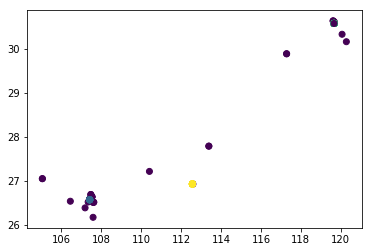

In [24]:
clustering_by_dbscan()

In [25]:
cluster = X['cluster'].value_counts().keys()[0]
cluster

1

In [26]:
X['cluster'].value_counts()


 1    101
 0    100
-1     37
 2     24
Name: cluster, dtype: int64

In [27]:
X['count'] = 1
xx = X[X['cluster'] == 0].groupby(['lat','lng']).sum().reset_index()

xx

,lat,lng,cluster,count
0,26.566833,107.414500,0,1
1,26.567667,107.414667,0,1
2,26.568000,107.414833,0,37
3,26.568000,107.415000,0,2
4,26.568167,107.414833,0,18
5,26.568167,107.415000,0,9
6,26.568333,107.415000,0,2
7,26.568333,107.415167,0,12
8,26.568500,107.415167,0,6
9,26.568667,107.415167,0,1


In [28]:
a = xx[xx['count'] ==max(xx['count'])]
xx[xx['count'] ==max(xx['count'])]

,lat,lng,cluster,count
2,26.568,107.414833,0,37


In [29]:
a['lat'].iloc[0]

26.567999999999998

In [30]:
a['lng'].iloc[0]

107.4148333

In [31]:
X['cluster'].value_counts().values[0]/X.shape[0]

0.38549618320610685

In [32]:
X[X['cluster'] == cluster][:10]

,lng,lat,cluster,count
55,119.664333,30.579167,1,1
56,119.664333,30.579167,1,1
57,119.664500,30.579333,1,1
58,119.664500,30.579500,1,1
59,119.664333,30.579000,1,1
60,119.664500,30.579333,1,1
61,119.664500,30.579333,1,1
62,119.664333,30.579167,1,1
63,119.664333,30.579000,1,1
64,119.664500,30.579500,1,1


In [33]:
X[X['cluster'] == cluster]['lng'].mean()

119.66432172277223

In [34]:
X[X['cluster'] == cluster]['lat'].mean()

30.579300301980204

In [35]:
120.12049999999999,29.338833300000005

(120.12049999999999, 29.338833300000005)

In [36]:
from sklearn.neighbors import KernelDensity

In [37]:
def kernel_density(x, y, typename):
    x_min = min(x)
    x_max = max(x)
    y_min = min(y)
    y_max = max(y)
    xx = list(zip(x, y))
    kde = KernelDensity(kernel='gaussian', bandwidth=0.1, algorithm='kd_tree').fit(xx)
    log_dens = kde.score_samples(xx)
    z = np.exp(log_dens).tolist()
    max_poi = z.index(max(z))
#     print(xx[z.index(max(z))])
    max_lon = x[max_poi]
    max_lat = y[max_poi]
#     fig1 = pl.figure()
#     ax1 = fig1.gca()
#     ax1.set_xlim(x_min, x_max)
#     ax1.set_ylim(y_min, y_max)
#     ax1.scatter(x, y, c=z, cmap='Blues')
#     ax1.scatter(x[max_poi], y[max_poi],marker='p', c='r')
# #     ax1.imshow(np.rot90(z), cmap = 'Blues', extent=[x_min, x_max, y_min, y_max])
# #     cset = ax1.contour(x, y, z, colors='k')
# #     ax1.clabel(cset, inline = 1, fontsize=10)
#     ax1.set_xlabel('lontitude')
#     ax1.set_ylabel('latitude')
#     filename = typename+' gkde1.jpg'
#     pl.savefig(filename)
    return max_lon, max_lat

In [38]:
x = X['lng']
y = X['lat']
kernel_density(x,y,'a')


(107.41583329999997, 26.570499999999996)

In [39]:
x_min = min(x)
x_max = max(x)
y_min = min(y)
y_max = max(y)
x_min

105.04149999999998

In [35]:
xx = list(zip(x, y))
xx

[(107.53266660000003, 26.636333300000004),
 (107.41500000000002, 26.568166599999998),
 (107.41516660000002, 26.568333300000006),
 (107.18333330000002, 26.383333300000004),
 (107.4148333, 26.568166599999998),
 (107.4148333, 26.567999999999998),
 (107.4148333, 26.568166599999998),
 (107.4148333, 26.567999999999998),
 (107.4148333, 26.568166599999998),
 (107.52333329999999, 26.634666600000003),
 (107.52233330000001, 26.6341666),
 (107.41500000000002, 26.568166599999998),
 (107.41516660000002, 26.568333300000006),
 (107.41516660000002, 26.5685),
 (107.4148333, 26.567999999999998),
 (107.47183330000001, 26.687333300000006),
 (107.47166659999999, 26.6875),
 (107.41516660000002, 26.568333300000006),
 (107.4148333, 26.567999999999998),
 (107.41500000000002, 26.568166599999998),
 (107.41449990000001, 26.5668333),
 (107.41500000000002, 26.568166599999998),
 (107.4148333, 26.567999999999998),
 (107.41566660000001, 26.569666600000005),
 (107.41566660000001, 26.571166599999998),
 (107.4148333, 26.5

In [36]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.1, algorithm='kd_tree').fit(xx)
log_dens = kde.score_samples(xx)
log_dens

array([ 1.12481799e+00,  1.90566944e+00,  1.90576661e+00, -1.91664308e+00,
        1.90560845e+00,  1.90556701e+00,  1.90560845e+00,  1.90556701e+00,
        1.90560845e+00,  1.22435987e+00,  1.23641986e+00,  1.90566944e+00,
        1.90576661e+00,  1.90580276e+00,  1.90556701e+00,  1.14173151e+00,
        1.14065808e+00,  1.90576661e+00,  1.90556701e+00,  1.90566944e+00,
        1.90507191e+00,  1.90566944e+00,  1.90556701e+00,  1.90614056e+00,
        1.90617507e+00,  1.90560845e+00,  1.90560845e+00,  1.90566944e+00,
        1.90560845e+00,  1.90623530e+00,  1.90560845e+00, -2.80105138e+00,
        1.90566944e+00, -2.10794100e+00, -2.10794100e+00,  1.90562794e+00,
        1.90556701e+00,  1.90556701e+00,  1.90556701e+00,  1.90556701e+00,
        1.90556701e+00,  1.90576661e+00,  1.90556701e+00,  1.90592284e+00,
        1.90566944e+00,  1.90583619e+00,  1.90560845e+00, -2.78368749e+00,
        1.23547166e+00,  1.90556701e+00,  1.90556701e+00, -2.10797365e+00,
       -2.10797365e+00,  

In [37]:
z = np.exp(log_dens).tolist()
z

[3.079656263671419,
 6.723907347776071,
 6.7245607421215725,
 0.14709993650854053,
 6.723497264390051,
 6.723218650832197,
 6.723497264390051,
 6.723218650832197,
 6.723497264390051,
 3.4019876566196983,
 3.4432640213802452,
 6.723907347776071,
 6.7245607421215725,
 6.724803883585533,
 6.723218650832197,
 3.132187072330963,
 3.128826721439526,
 6.7245607421215725,
 6.723218650832197,
 6.723907347776071,
 6.719890849798097,
 6.723907347776071,
 6.723218650832197,
 6.727075888081496,
 6.727308045032268,
 6.723497264390051,
 6.723497264390051,
 6.723907347776071,
 6.723497264390051,
 6.727713233055917,
 6.723497264390051,
 0.06074616148548518,
 6.723907347776071,
 0.12148785208295422,
 0.12148785208295422,
 6.723628354611248,
 6.723218650832197,
 6.723218650832197,
 6.723218650832197,
 6.723218650832197,
 6.723218650832197,
 6.7245607421215725,
 6.723218650832197,
 6.725611430100545,
 6.723907347776071,
 6.725028691385023,
 6.723497264390051,
 0.06181016243498528,
 3.4400006375691596,
 6.

Text(0, 0.5, 'latitude')

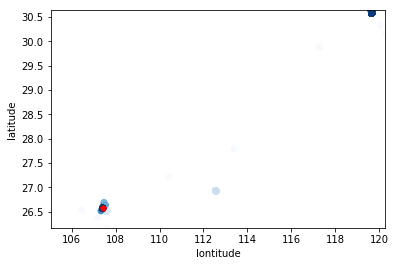

In [38]:
max_poi = z.index(max(z))
#     print(xx[z.index(max(z))])
max_lon = x[max_poi]
max_lat = y[max_poi]
fig1 = plt.figure()
ax1 = fig1.gca()
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)
ax1.scatter(x, y, c=z, cmap='Blues')
ax1.scatter(x[max_poi], y[max_poi],marker='p', c='r')
# ax1.imshow(np.rot90(xy), cmap = 'Blues', extent=[x_min, x_max, y_min, y_max])
# cset = ax1.contour(x, y, z, colors='k')
# ax1.clabel(cset, inline = 1, fontsize=10)
ax1.set_xlabel('lontitude')
ax1.set_ylabel('latitude')
#filename = typename+' gkde1.jpg'
#pl.savefig(filename)
    #return max_lon, max_lat

In [39]:
max_lon
max_lat

26.570499999999996

In [40]:
np.rot90(xy)

array([[ 26.6363333,  26.5681666,  26.5683333,  26.3833333,  26.5681666,
         26.568    ,  26.5681666,  26.568    ,  26.5681666,  26.6346666,
         26.6341666,  26.5681666,  26.5683333,  26.5685   ,  26.568    ,
         26.6873333,  26.6875   ,  26.5683333,  26.568    ,  26.5681666,
         26.5668333,  26.5681666,  26.568    ,  26.5696666,  26.5711666,
         26.5681666,  26.5681666,  26.5681666,  26.5681666,  26.5705   ,
         26.5681666,  26.5343333,  26.5681666,  27.0475   ,  27.0478333,
         26.568    ,  26.568    ,  26.568    ,  26.568    ,  26.568    ,
         26.568    ,  26.5683333,  26.568    ,  26.5688333,  26.5681666,
         26.5686666,  26.5681666,  26.1685   ,  26.6343333,  26.568    ,
         26.568    ,  29.889    ,  29.889    ,  30.6381666,  30.6376666,
         30.5791666,  30.5791666,  30.5793333,  30.5795   ,  30.579    ,
         30.5793333,  30.5793333,  30.5791666,  30.579    ,  30.5795   ,
         30.579    ,  30.5793333,  30.579    ,  30.

In [41]:
len(xy[0])

2